<a href="https://colab.research.google.com/github/dayviddouglas/ciencia_de_dados_licitacoes_prefeitura_do_recife/blob/main/Licita%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importa as bibliotecas faz uma requisição do dataset e define o encoding para utf-8 case não consiga executar a requisição retorna um erro

In [116]:
import pandas as pd
import requests as req
from io import StringIO
import urllib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


url =  "http://dados.recife.pe.gov.br/dataset/591a6ed4-7beb-4304-a2a1-2af521517a06/resource/c5d7505c-381c-4670-a0c2-1fbf56df50b1/download/dados_abertos_licitacao_concluida.csv"

try:
    response = req.get(url)
    response.encoding = 'utf-8'
    response.raise_for_status()  # Lança um erro para respostas não-sucedidas
    # Usando StringIO para converter o texto em um arquivo em memória e, então, lendo com o Pandas
    csv_raw = StringIO(response.text)
    base = pd.read_csv(csv_raw, sep=';', encoding='utf-8')



except req.RequestException as e:
    print(f"Erro ao acessar o arquivo: {e}")


# Lê o cabeçalho

In [117]:
base.head(3)

,comissao_licitacao,ano_processolicitatorio,num_processolicitatorio,numero_lote,modalidadeprocessolicitatorio,numerolicitacaomodalidade,anolicitacaomodalidade,orgao_licitante,objeto,cnpj_contratado,...,num_endcontratado,comp_endcontratado,bairro_endcontratado,cidade_endcontratado,uf_endcontratado,valor_total_estimado,valor_totalhomologadolicitacao,valor_licitacao_lote,data_aberturaproposta,data_ultimafaseprocesso
0,COMISSÃO PERMANENTE DE LICITAÇÃO DE EDUCAÇÃO -...,2012,29,1,PREGÃO ELETRÔNICO,27,2012,SECRETARIA DE EDUCAÇÃO,MATERIAL GRÁFICO,7.586060e+11,...,301.0,NaN,BULTRINS,OLINDA,PE,"333750,00","66358,00","15210,00",2012/12/20 10:00:00.000,2013/01/07 00:00:00.000
1,COMISSÃO PERMANENTE DE LICITAÇÃO DE EDUCAÇÃO -...,2012,29,2,PREGÃO ELETRÔNICO,27,2012,SECRETARIA DE EDUCAÇÃO,MATERIAL GRÁFICO,7.211171e+12,...,5327.0,NaN,CANDEIAS,JABOATAO DOS GUARARAPES,PE,"333750,00","66358,00","51148,00",2012/12/20 10:00:00.000,2013/01/07 00:00:00.000
2,COMISSÃO PERMANENTE DE LICITAÇÃO DE EDUCAÇÃO -...,2012,30,1,PREGÃO ELETRÔNICO,28,2012,SECRETARIA DE EDUCAÇÃO,AGENDA ESCOLAR 2013,1.389899e+13,...,0.0,LOJA 005,CIDADE UNIVERSITARIA,MACEIO,AL,"530469,54","357895,02","357895,02",2013/01/02 10:00:00.000,2013/01/09 00:00:00.000


# Informações da base

In [118]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19131 entries, 0 to 19130
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   comissao_licitacao              19131 non-null  object 
 1   ano_processolicitatorio         19131 non-null  int64  
 2   num_processolicitatorio         19131 non-null  int64  
 3   numero_lote                     19131 non-null  int64  
 4   modalidadeprocessolicitatorio   19131 non-null  object 
 5   numerolicitacaomodalidade       19131 non-null  int64  
 6   anolicitacaomodalidade          19131 non-null  int64  
 7   orgao_licitante                 19131 non-null  object 
 8   objeto                          19131 non-null  object 
 9   cnpj_contratado                 19115 non-null  float64
 10  cpf_contratado                  16 non-null     float64
 11  razao_nomecontratado            19131 non-null  object 
 12  logradouro_endcontratado        

# Corrigindo tipos das tabelas

In [119]:
base.num_endcontratado.dtypes

dtype('float64')

In [120]:
base.data_ultimafaseprocesso.dtypes

dtype('O')

In [121]:
base.cpf_contratado.dtypes

dtype('float64')

In [122]:
base['data_ultimafaseprocesso'] = pd.to_datetime(base['data_ultimafaseprocesso'])
base['data_aberturaproposta'] = pd.to_datetime(base['data_aberturaproposta'])

In [123]:
base['num_endcontratado'] = base['num_endcontratado'].round().astype('object')

In [124]:
base['cpf_contratado'] = base['cpf_contratado'].astype('object')
base['cnpj_contratado'] = base['cnpj_contratado'].astype('object')

In [125]:
base['valor_total_estimado'] = base['valor_total_estimado'].str.replace(',', '.')
base['valor_licitacao_lote'] = base['valor_licitacao_lote'].str.replace(',', '.')
base['valor_totalhomologadolicitacao'] = base['valor_totalhomologadolicitacao'].str.replace(',', '.')
base['valor_totalhomologadolicitacao'] = base['valor_totalhomologadolicitacao'].fillna(0)
base['valor_total_estimado'] = base['valor_total_estimado'].astype('float')
base['valor_totalhomologadolicitacao'] = base['valor_totalhomologadolicitacao'].astype('float')
base['valor_licitacao_lote'] = base['valor_licitacao_lote'].astype('float')

# Valores nulos

In [126]:
base.isnull().sum()

comissao_licitacao                    0
ano_processolicitatorio               0
num_processolicitatorio               0
numero_lote                           0
modalidadeprocessolicitatorio         0
numerolicitacaomodalidade             0
anolicitacaomodalidade                0
orgao_licitante                       0
objeto                                0
cnpj_contratado                      16
cpf_contratado                    19115
razao_nomecontratado                  0
logradouro_endcontratado             12
num_endcontratado                  1567
comp_endcontratado                 9243
bairro_endcontratado                 38
cidade_endcontratado                 12
uf_endcontratado                     29
valor_total_estimado                  0
valor_totalhomologadolicitacao        0
valor_licitacao_lote                  0
data_aberturaproposta                 0
data_ultimafaseprocesso               0
dtype: int64

In [127]:
base.isna().sum()

comissao_licitacao                    0
ano_processolicitatorio               0
num_processolicitatorio               0
numero_lote                           0
modalidadeprocessolicitatorio         0
numerolicitacaomodalidade             0
anolicitacaomodalidade                0
orgao_licitante                       0
objeto                                0
cnpj_contratado                      16
cpf_contratado                    19115
razao_nomecontratado                  0
logradouro_endcontratado             12
num_endcontratado                  1567
comp_endcontratado                 9243
bairro_endcontratado                 38
cidade_endcontratado                 12
uf_endcontratado                     29
valor_total_estimado                  0
valor_totalhomologadolicitacao        0
valor_licitacao_lote                  0
data_aberturaproposta                 0
data_ultimafaseprocesso               0
dtype: int64

In [128]:
base.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19126    False
19127    False
19128    False
19129    False
19130    False
Length: 19131, dtype: bool

# corrigindo valores nulos nos endereços

In [129]:
base[base.logradouro_endcontratado.isnull()]

,comissao_licitacao,ano_processolicitatorio,num_processolicitatorio,numero_lote,modalidadeprocessolicitatorio,numerolicitacaomodalidade,anolicitacaomodalidade,orgao_licitante,objeto,cnpj_contratado,...,num_endcontratado,comp_endcontratado,bairro_endcontratado,cidade_endcontratado,uf_endcontratado,valor_total_estimado,valor_totalhomologadolicitacao,valor_licitacao_lote,data_aberturaproposta,data_ultimafaseprocesso
984,COMISSÃO PERMANENTE DE LICITAÇÃO DE SERVIÇOS D...,2013,15,1,PREGÃO ELETRÔNICO,12,2013,FUNDO MUNICIPAL DE SAUDE,"AQUISIÇÃO DE TESTE HEMATOLÓGICOS BIOQUÍMICOS, ...",42160812000144.0,...,NaN,NaN,NaN,NaN,NaN,9207876.50,3186059.50,1148899.5,2013-10-04 10:00:00,2013-11-14
985,COMISSÃO PERMANENTE DE LICITAÇÃO DE SERVIÇOS D...,2013,15,2,PREGÃO ELETRÔNICO,12,2013,FUNDO MUNICIPAL DE SAUDE,"AQUISIÇÃO DE TESTE HEMATOLÓGICOS BIOQUÍMICOS, ...",42160812000144.0,...,NaN,NaN,NaN,NaN,NaN,9207876.50,3186059.50,311400.0,2013-10-04 10:00:00,2013-11-14
4161,COMISSÃO PERMANENTE DE LICITAÇÃO DE SERVIÇOS D...,2015,17,2,PREGÃO ELETRÔNICO,12,2015,FUNDO MUNICIPAL DE SAUDE,REGISTRO DE PREÇOS PARA AQUISIÇÃO DE GRUPOS GE...,92753268005262.0,...,NaN,NaN,NaN,NaN,NaN,2930322.00,2853400.00,2500000.0,2015-06-29 10:00:00,2015-08-17
11923,EQUIPE DE PREGÃO - EMLURB,2020,2,4,PREGÃO ELETRÔNICO,2,2020,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,"REGISTRO DE PREÇOS, PARA AQUISIÇÃO DE MATERIAI...",10376365000179.0,...,699.0,BLOCO A,NaN,NaN,NaN,20830169.37,9648900.84,8490.0,2020-03-30 10:00:00,2021-01-13
11927,EQUIPE DE PREGÃO - EMLURB,2020,2,8,PREGÃO ELETRÔNICO,2,2020,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,"REGISTRO DE PREÇOS, PARA AQUISIÇÃO DE MATERIAI...",10376365000179.0,...,699.0,BLOCO A,NaN,NaN,NaN,20830169.37,9648900.84,5499.5,2020-03-30 10:00:00,2021-01-13
11929,EQUIPE DE PREGÃO - EMLURB,2020,2,10,PREGÃO ELETRÔNICO,2,2020,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,"REGISTRO DE PREÇOS, PARA AQUISIÇÃO DE MATERIAI...",10376365000179.0,...,699.0,BLOCO A,NaN,NaN,NaN,20830169.37,9648900.84,35000.0,2020-03-30 10:00:00,2021-01-13
11932,EQUIPE DE PREGÃO - EMLURB,2020,2,13,PREGÃO ELETRÔNICO,2,2020,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,"REGISTRO DE PREÇOS, PARA AQUISIÇÃO DE MATERIAI...",10376365000179.0,...,699.0,BLOCO A,NaN,NaN,NaN,20830169.37,9648900.84,36500.0,2020-03-30 10:00:00,2021-01-13
11933,EQUIPE DE PREGÃO - EMLURB,2020,2,14,PREGÃO ELETRÔNICO,2,2020,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,"REGISTRO DE PREÇOS, PARA AQUISIÇÃO DE MATERIAI...",10376365000179.0,...,699.0,BLOCO A,NaN,NaN,NaN,20830169.37,9648900.84,43750.0,2020-03-30 10:00:00,2021-01-13
11934,EQUIPE DE PREGÃO - EMLURB,2020,2,15,PREGÃO ELETRÔNICO,2,2020,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,"REGISTRO DE PREÇOS, PARA AQUISIÇÃO DE MATERIAI...",10376365000179.0,...,699.0,BLOCO A,NaN,NaN,NaN,20830169.37,9648900.84,29500.0,2020-03-30 10:00:00,2021-01-13
11936,EQUIPE DE PREGÃO - EMLURB,2020,2,17,PREGÃO ELETRÔNICO,2,2020,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,"REGISTRO DE PREÇOS, PARA AQUISIÇÃO DE MATERIAI...",10376365000179.0,...,699.0,BLOCO A,NaN,NaN,NaN,20830169.37,9648900.84,16500.0,2020-03-30 10:00:00,2021-01-13


In [130]:
base[base.bairro_endcontratado.isnull()]

,comissao_licitacao,ano_processolicitatorio,num_processolicitatorio,numero_lote,modalidadeprocessolicitatorio,numerolicitacaomodalidade,anolicitacaomodalidade,orgao_licitante,objeto,cnpj_contratado,...,num_endcontratado,comp_endcontratado,bairro_endcontratado,cidade_endcontratado,uf_endcontratado,valor_total_estimado,valor_totalhomologadolicitacao,valor_licitacao_lote,data_aberturaproposta,data_ultimafaseprocesso
984,COMISSÃO PERMANENTE DE LICITAÇÃO DE SERVIÇOS D...,2013,15,1,PREGÃO ELETRÔNICO,12,2013,FUNDO MUNICIPAL DE SAUDE,"AQUISIÇÃO DE TESTE HEMATOLÓGICOS BIOQUÍMICOS, ...",42160812000144.0,...,NaN,NaN,NaN,NaN,NaN,9207876.50,3186059.50,1148899.50,2013-10-04 10:00:00,2013-11-14
985,COMISSÃO PERMANENTE DE LICITAÇÃO DE SERVIÇOS D...,2013,15,2,PREGÃO ELETRÔNICO,12,2013,FUNDO MUNICIPAL DE SAUDE,"AQUISIÇÃO DE TESTE HEMATOLÓGICOS BIOQUÍMICOS, ...",42160812000144.0,...,NaN,NaN,NaN,NaN,NaN,9207876.50,3186059.50,311400.00,2013-10-04 10:00:00,2013-11-14
4161,COMISSÃO PERMANENTE DE LICITAÇÃO DE SERVIÇOS D...,2015,17,2,PREGÃO ELETRÔNICO,12,2015,FUNDO MUNICIPAL DE SAUDE,REGISTRO DE PREÇOS PARA AQUISIÇÃO DE GRUPOS GE...,92753268005262.0,...,NaN,NaN,NaN,NaN,NaN,2930322.00,2853400.00,2500000.00,2015-06-29 10:00:00,2015-08-17
9457,COMISSÃO ESPECIAL DE LICITAÇÃO - GABPE,2019,31,1,CONCORRÊNCIA - PRESENCIAL,13,2019,GABINETE DE PROJETOS ESPECIAIS,CONTRATAÇÃO DE EMPRESA ESPECIALIZADA PARA AQUI...,4855314000127.0,...,31.0,NaN,NaN,NITEROI,RJ,6005480.21,4850725.96,4850725.96,2019-12-04 09:30:00,2020-01-30
10850,COMISSÃO PERMANENTE DE LICITAÇÃO DE SERVIÇOS -...,2019,17,1,PREGÃO ELETRÔNICO,16,2019,SECRETARIA DE POLÍTICA URBANA E LICENCIAMENTO,REGISTRO DE PREÇOS PARA CONTRATAÇÃO DE SERVIÇO...,18428790000176.0,...,1825.0,301,NaN,BELO HORIZONTE,NaN,4874616.00,4599972.00,4599972.00,2019-09-27 09:00:00,2020-02-17
11237,COMISSÃO ESPECIAL DE LICITAÇÃO - GABPE,2020,10,1,PREGÃO ELETRÔNICO,2,2020,GABINETE DE PROJETOS ESPECIAIS,AQUISICAO E INSTALACAO DE CORTINA CORTA FOGO P...,4855314000127.0,...,31.0,NaN,NaN,NITEROI,RJ,333267.56,330000.00,330000.00,2020-08-11 10:30:00,2020-08-21
11923,EQUIPE DE PREGÃO - EMLURB,2020,2,4,PREGÃO ELETRÔNICO,2,2020,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,"REGISTRO DE PREÇOS, PARA AQUISIÇÃO DE MATERIAI...",10376365000179.0,...,699.0,BLOCO A,NaN,NaN,NaN,20830169.37,9648900.84,8490.00,2020-03-30 10:00:00,2021-01-13
11927,EQUIPE DE PREGÃO - EMLURB,2020,2,8,PREGÃO ELETRÔNICO,2,2020,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,"REGISTRO DE PREÇOS, PARA AQUISIÇÃO DE MATERIAI...",10376365000179.0,...,699.0,BLOCO A,NaN,NaN,NaN,20830169.37,9648900.84,5499.50,2020-03-30 10:00:00,2021-01-13
11929,EQUIPE DE PREGÃO - EMLURB,2020,2,10,PREGÃO ELETRÔNICO,2,2020,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,"REGISTRO DE PREÇOS, PARA AQUISIÇÃO DE MATERIAI...",10376365000179.0,...,699.0,BLOCO A,NaN,NaN,NaN,20830169.37,9648900.84,35000.00,2020-03-30 10:00:00,2021-01-13
11932,EQUIPE DE PREGÃO - EMLURB,2020,2,13,PREGÃO ELETRÔNICO,2,2020,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,"REGISTRO DE PREÇOS, PARA AQUISIÇÃO DE MATERIAI...",10376365000179.0,...,699.0,BLOCO A,NaN,NaN,NaN,20830169.37,9648900.84,36500.00,2020-03-30 10:00:00,2021-01-13


In [131]:
base[base.uf_endcontratado.isnull()]

,comissao_licitacao,ano_processolicitatorio,num_processolicitatorio,numero_lote,modalidadeprocessolicitatorio,numerolicitacaomodalidade,anolicitacaomodalidade,orgao_licitante,objeto,cnpj_contratado,...,num_endcontratado,comp_endcontratado,bairro_endcontratado,cidade_endcontratado,uf_endcontratado,valor_total_estimado,valor_totalhomologadolicitacao,valor_licitacao_lote,data_aberturaproposta,data_ultimafaseprocesso
984,COMISSÃO PERMANENTE DE LICITAÇÃO DE SERVIÇOS D...,2013,15,1,PREGÃO ELETRÔNICO,12,2013,FUNDO MUNICIPAL DE SAUDE,"AQUISIÇÃO DE TESTE HEMATOLÓGICOS BIOQUÍMICOS, ...",42160812000144.0,...,NaN,NaN,NaN,NaN,NaN,9207876.50,3186059.50,1148899.50,2013-10-04 10:00:00,2013-11-14
985,COMISSÃO PERMANENTE DE LICITAÇÃO DE SERVIÇOS D...,2013,15,2,PREGÃO ELETRÔNICO,12,2013,FUNDO MUNICIPAL DE SAUDE,"AQUISIÇÃO DE TESTE HEMATOLÓGICOS BIOQUÍMICOS, ...",42160812000144.0,...,NaN,NaN,NaN,NaN,NaN,9207876.50,3186059.50,311400.00,2013-10-04 10:00:00,2013-11-14
4161,COMISSÃO PERMANENTE DE LICITAÇÃO DE SERVIÇOS D...,2015,17,2,PREGÃO ELETRÔNICO,12,2015,FUNDO MUNICIPAL DE SAUDE,REGISTRO DE PREÇOS PARA AQUISIÇÃO DE GRUPOS GE...,92753268005262.0,...,NaN,NaN,NaN,NaN,NaN,2930322.00,2853400.00,2500000.00,2015-06-29 10:00:00,2015-08-17
10850,COMISSÃO PERMANENTE DE LICITAÇÃO DE SERVIÇOS -...,2019,17,1,PREGÃO ELETRÔNICO,16,2019,SECRETARIA DE POLÍTICA URBANA E LICENCIAMENTO,REGISTRO DE PREÇOS PARA CONTRATAÇÃO DE SERVIÇO...,18428790000176.0,...,1825.0,301,NaN,BELO HORIZONTE,NaN,4874616.00,4599972.00,4599972.00,2019-09-27 09:00:00,2020-02-17
11923,EQUIPE DE PREGÃO - EMLURB,2020,2,4,PREGÃO ELETRÔNICO,2,2020,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,"REGISTRO DE PREÇOS, PARA AQUISIÇÃO DE MATERIAI...",10376365000179.0,...,699.0,BLOCO A,NaN,NaN,NaN,20830169.37,9648900.84,8490.00,2020-03-30 10:00:00,2021-01-13
11927,EQUIPE DE PREGÃO - EMLURB,2020,2,8,PREGÃO ELETRÔNICO,2,2020,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,"REGISTRO DE PREÇOS, PARA AQUISIÇÃO DE MATERIAI...",10376365000179.0,...,699.0,BLOCO A,NaN,NaN,NaN,20830169.37,9648900.84,5499.50,2020-03-30 10:00:00,2021-01-13
11929,EQUIPE DE PREGÃO - EMLURB,2020,2,10,PREGÃO ELETRÔNICO,2,2020,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,"REGISTRO DE PREÇOS, PARA AQUISIÇÃO DE MATERIAI...",10376365000179.0,...,699.0,BLOCO A,NaN,NaN,NaN,20830169.37,9648900.84,35000.00,2020-03-30 10:00:00,2021-01-13
11932,EQUIPE DE PREGÃO - EMLURB,2020,2,13,PREGÃO ELETRÔNICO,2,2020,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,"REGISTRO DE PREÇOS, PARA AQUISIÇÃO DE MATERIAI...",10376365000179.0,...,699.0,BLOCO A,NaN,NaN,NaN,20830169.37,9648900.84,36500.00,2020-03-30 10:00:00,2021-01-13
11933,EQUIPE DE PREGÃO - EMLURB,2020,2,14,PREGÃO ELETRÔNICO,2,2020,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,"REGISTRO DE PREÇOS, PARA AQUISIÇÃO DE MATERIAI...",10376365000179.0,...,699.0,BLOCO A,NaN,NaN,NaN,20830169.37,9648900.84,43750.00,2020-03-30 10:00:00,2021-01-13
11934,EQUIPE DE PREGÃO - EMLURB,2020,2,15,PREGÃO ELETRÔNICO,2,2020,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,"REGISTRO DE PREÇOS, PARA AQUISIÇÃO DE MATERIAI...",10376365000179.0,...,699.0,BLOCO A,NaN,NaN,NaN,20830169.37,9648900.84,29500.00,2020-03-30 10:00:00,2021-01-13


In [132]:
base['num_endcontratado'] = base['num_endcontratado'].fillna('S/N')

In [133]:
base['cpf_contratado'] = base['cpf_contratado'].fillna('Empresa')

In [134]:
base['cnpj_contratado'] = base['cnpj_contratado'].fillna('PF')

In [135]:
base[base.razao_nomecontratado == 'BECKMAN COULTER DO BRASIL LTDA']

,comissao_licitacao,ano_processolicitatorio,num_processolicitatorio,numero_lote,modalidadeprocessolicitatorio,numerolicitacaomodalidade,anolicitacaomodalidade,orgao_licitante,objeto,cnpj_contratado,...,num_endcontratado,comp_endcontratado,bairro_endcontratado,cidade_endcontratado,uf_endcontratado,valor_total_estimado,valor_totalhomologadolicitacao,valor_licitacao_lote,data_aberturaproposta,data_ultimafaseprocesso
984,COMISSÃO PERMANENTE DE LICITAÇÃO DE SERVIÇOS D...,2013,15,1,PREGÃO ELETRÔNICO,12,2013,FUNDO MUNICIPAL DE SAUDE,"AQUISIÇÃO DE TESTE HEMATOLÓGICOS BIOQUÍMICOS, ...",42160812000144.0,...,S/N,NaN,NaN,NaN,NaN,9207876.5,3186059.5,1148899.5,2013-10-04 10:00:00,2013-11-14
985,COMISSÃO PERMANENTE DE LICITAÇÃO DE SERVIÇOS D...,2013,15,2,PREGÃO ELETRÔNICO,12,2013,FUNDO MUNICIPAL DE SAUDE,"AQUISIÇÃO DE TESTE HEMATOLÓGICOS BIOQUÍMICOS, ...",42160812000144.0,...,S/N,NaN,NaN,NaN,NaN,9207876.5,3186059.5,311400.0,2013-10-04 10:00:00,2013-11-14


Corrigindo empresa BECKMAN COULTER DO BRASIL LTDA

In [136]:
base.loc[base['razao_nomecontratado'] == 'BECKMAN COULTER DO BRASIL LTDA', 'logradouro_endcontratado'] = 'Al. Rio Negro'

In [137]:
base.loc[base['razao_nomecontratado'] == 'BECKMAN COULTER DO BRASIL LTDA', 'num_endcontratado'] = 500

In [138]:
base.loc[base['razao_nomecontratado'] == 'BECKMAN COULTER DO BRASIL LTDA', 'comp_endcontratado'] = '15º andar'

In [139]:
base.loc[base['razao_nomecontratado'] == 'BECKMAN COULTER DO BRASIL LTDA', 'cidade_endcontratado'] = 'Barueri'

In [140]:
base.loc[base['razao_nomecontratado'] == 'BECKMAN COULTER DO BRASIL LTDA', 'uf_endcontratado'] = 'SP'

In [141]:
base.loc[base['razao_nomecontratado'] == 'BECKMAN COULTER DO BRASIL LTDA', 'bairro_endcontratado'] = 'Alphaville Industrial'

Corrigindo empresa FICAPOÇOS FIOS E CABOS LTDA.

http://cnpj.info/10376365000179

In [142]:
base[base.razao_nomecontratado == 'FICAPOÇOS FIOS E CABOS LTDA.']

,comissao_licitacao,ano_processolicitatorio,num_processolicitatorio,numero_lote,modalidadeprocessolicitatorio,numerolicitacaomodalidade,anolicitacaomodalidade,orgao_licitante,objeto,cnpj_contratado,...,num_endcontratado,comp_endcontratado,bairro_endcontratado,cidade_endcontratado,uf_endcontratado,valor_total_estimado,valor_totalhomologadolicitacao,valor_licitacao_lote,data_aberturaproposta,data_ultimafaseprocesso
11923,EQUIPE DE PREGÃO - EMLURB,2020,2,4,PREGÃO ELETRÔNICO,2,2020,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,"REGISTRO DE PREÇOS, PARA AQUISIÇÃO DE MATERIAI...",10376365000179.0,...,699.0,BLOCO A,NaN,NaN,NaN,20830169.37,9648900.84,8490.0,2020-03-30 10:00:00,2021-01-13
11927,EQUIPE DE PREGÃO - EMLURB,2020,2,8,PREGÃO ELETRÔNICO,2,2020,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,"REGISTRO DE PREÇOS, PARA AQUISIÇÃO DE MATERIAI...",10376365000179.0,...,699.0,BLOCO A,NaN,NaN,NaN,20830169.37,9648900.84,5499.5,2020-03-30 10:00:00,2021-01-13
11929,EQUIPE DE PREGÃO - EMLURB,2020,2,10,PREGÃO ELETRÔNICO,2,2020,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,"REGISTRO DE PREÇOS, PARA AQUISIÇÃO DE MATERIAI...",10376365000179.0,...,699.0,BLOCO A,NaN,NaN,NaN,20830169.37,9648900.84,35000.0,2020-03-30 10:00:00,2021-01-13
11932,EQUIPE DE PREGÃO - EMLURB,2020,2,13,PREGÃO ELETRÔNICO,2,2020,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,"REGISTRO DE PREÇOS, PARA AQUISIÇÃO DE MATERIAI...",10376365000179.0,...,699.0,BLOCO A,NaN,NaN,NaN,20830169.37,9648900.84,36500.0,2020-03-30 10:00:00,2021-01-13
11933,EQUIPE DE PREGÃO - EMLURB,2020,2,14,PREGÃO ELETRÔNICO,2,2020,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,"REGISTRO DE PREÇOS, PARA AQUISIÇÃO DE MATERIAI...",10376365000179.0,...,699.0,BLOCO A,NaN,NaN,NaN,20830169.37,9648900.84,43750.0,2020-03-30 10:00:00,2021-01-13
11934,EQUIPE DE PREGÃO - EMLURB,2020,2,15,PREGÃO ELETRÔNICO,2,2020,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,"REGISTRO DE PREÇOS, PARA AQUISIÇÃO DE MATERIAI...",10376365000179.0,...,699.0,BLOCO A,NaN,NaN,NaN,20830169.37,9648900.84,29500.0,2020-03-30 10:00:00,2021-01-13
11936,EQUIPE DE PREGÃO - EMLURB,2020,2,17,PREGÃO ELETRÔNICO,2,2020,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,"REGISTRO DE PREÇOS, PARA AQUISIÇÃO DE MATERIAI...",10376365000179.0,...,699.0,BLOCO A,NaN,NaN,NaN,20830169.37,9648900.84,16500.0,2020-03-30 10:00:00,2021-01-13
11938,EQUIPE DE PREGÃO - EMLURB,2020,2,19,PREGÃO ELETRÔNICO,2,2020,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,"REGISTRO DE PREÇOS, PARA AQUISIÇÃO DE MATERIAI...",10376365000179.0,...,699.0,BLOCO A,NaN,NaN,NaN,20830169.37,9648900.84,26700.0,2020-03-30 10:00:00,2021-01-13
11939,EQUIPE DE PREGÃO - EMLURB,2020,2,20,PREGÃO ELETRÔNICO,2,2020,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,"REGISTRO DE PREÇOS, PARA AQUISIÇÃO DE MATERIAI...",10376365000179.0,...,699.0,BLOCO A,NaN,NaN,NaN,20830169.37,9648900.84,25600.0,2020-03-30 10:00:00,2021-01-13


In [143]:
base.loc[base['razao_nomecontratado'] == 'FICAPOÇOS FIOS E CABOS LTDA.', 'logradouro_endcontratado'] = 'RUA UM'

In [144]:
base.loc[base['razao_nomecontratado'] == 'FICAPOÇOS FIOS E CABOS LTDA.', 'bairro_endcontratado'] = 'DISTRITO INDUSTRIAL'

In [145]:
base.loc[base['razao_nomecontratado'] == 'FICAPOÇOS FIOS E CABOS LTDA.', 'cidade_endcontratado'] = 'POCOS DE CALDAS'

In [146]:
base.loc[base['razao_nomecontratado'] == 'FICAPOÇOS FIOS E CABOS LTDA.', 'uf_endcontratado'] = 'MG'

Corrigindo empresa STEMAC SA GRUPOS GERADORES

http://cnpj.info/Stemac-Sa-Grupos-Geradores-Em-Recuperacao-Judicial-Anchieta-Porto-Alegre


In [147]:
base[base.razao_nomecontratado == 'STEMAC SA GRUPOS GERADORES']

,comissao_licitacao,ano_processolicitatorio,num_processolicitatorio,numero_lote,modalidadeprocessolicitatorio,numerolicitacaomodalidade,anolicitacaomodalidade,orgao_licitante,objeto,cnpj_contratado,...,num_endcontratado,comp_endcontratado,bairro_endcontratado,cidade_endcontratado,uf_endcontratado,valor_total_estimado,valor_totalhomologadolicitacao,valor_licitacao_lote,data_aberturaproposta,data_ultimafaseprocesso
4161,COMISSÃO PERMANENTE DE LICITAÇÃO DE SERVIÇOS D...,2015,17,2,PREGÃO ELETRÔNICO,12,2015,FUNDO MUNICIPAL DE SAUDE,REGISTRO DE PREÇOS PARA AQUISIÇÃO DE GRUPOS GE...,92753268005262.0,...,S/N,NaN,NaN,NaN,NaN,2930322.0,2853400.0,2500000.0,2015-06-29 10:00:00,2015-08-17


In [148]:
base.loc[base['razao_nomecontratado'] == 'STEMAC SA GRUPOS GERADORES', 'logradouro_endcontratado'] = 'AVENIDA SEVERO DULLIUS'

In [149]:
base.loc[base['razao_nomecontratado'] == 'STEMAC SA GRUPOS GERADORES', 'bairro_endcontratado'] = 'ANCHIETA'

In [150]:
base.loc[base['razao_nomecontratado'] == 'STEMAC SA GRUPOS GERADORES', 'cidade_endcontratado'] = 'PORTO ALEGRE'

In [151]:
base.loc[base['razao_nomecontratado'] == 'STEMAC SA GRUPOS GERADORES', 'uf_endcontratado'] = 'RS'

In [152]:
base.loc[base['razao_nomecontratado'] == 'STEMAC SA GRUPOS GERADORES', 'comp_endcontratado'] = 'Sala 1101-2'

In [153]:
base.loc[base['razao_nomecontratado'] == 'STEMAC SA GRUPOS GERADORES', 'num_endcontratado'] = 1395

Corrigindo empresa FML TECNOLOGIA ELETRONICA - EIRELI

http://cnpj.info/Fml-Tecnologia-Eletronica-Eireli-Fml-Tecnologia

In [154]:
base[base.razao_nomecontratado == 'FML TECNOLOGIA ELETRONICA - EIRELI']

,comissao_licitacao,ano_processolicitatorio,num_processolicitatorio,numero_lote,modalidadeprocessolicitatorio,numerolicitacaomodalidade,anolicitacaomodalidade,orgao_licitante,objeto,cnpj_contratado,...,num_endcontratado,comp_endcontratado,bairro_endcontratado,cidade_endcontratado,uf_endcontratado,valor_total_estimado,valor_totalhomologadolicitacao,valor_licitacao_lote,data_aberturaproposta,data_ultimafaseprocesso
14238,EQUIPE DE PREGÃO - EMLURB,2021,11,5,PREGÃO ELETRÔNICO,11,2021,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,AQUISICAO DE LUMINARIAS E PROJETORES COM TECNO...,16981262000114.0,...,2965.0,NaN,NaN,RECIFE,PE,21202161.70,7836333.25,29499.75,2021-06-10 09:30:00,2021-09-30
14239,EQUIPE DE PREGÃO - EMLURB,2021,11,6,PREGÃO ELETRÔNICO,11,2021,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,AQUISICAO DE LUMINARIAS E PROJETORES COM TECNO...,16981262000114.0,...,2965.0,NaN,NaN,RECIFE,PE,21202161.70,7836333.25,382095.00,2021-06-10 09:30:00,2021-09-30
14242,EQUIPE DE PREGÃO - EMLURB,2021,11,9,PREGÃO ELETRÔNICO,11,2021,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,AQUISICAO DE LUMINARIAS E PROJETORES COM TECNO...,16981262000114.0,...,2965.0,NaN,NaN,RECIFE,PE,21202161.70,7836333.25,319999.50,2021-06-10 09:30:00,2021-09-30
16488,EQUIPE DE PREGÃO - EMLURB,2022,11,4,PREGÃO ELETRÔNICO,11,2022,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,AQUISICAO DE LUMINARIAS E PROJETORES COM TECNO...,16981262000114.0,...,2965.0,NaN,NaN,RECIFE,PE,8284746.65,0.00,149988.75,2022-05-10 09:30:00,2022-12-30
16489,EQUIPE DE PREGÃO - EMLURB,2022,11,5,PREGÃO ELETRÔNICO,11,2022,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,AQUISICAO DE LUMINARIAS E PROJETORES COM TECNO...,16981262000114.0,...,2965.0,NaN,NaN,RECIFE,PE,8284746.65,0.00,236250.00,2022-05-10 09:30:00,2022-12-30


In [155]:
base.loc[base['razao_nomecontratado'] == 'FML TECNOLOGIA ELETRONICA - EIRELI', 'bairro_endcontratado'] = 'IBURA'

Corrigindo endereços por cidade

In [156]:
base.loc[base['logradouro_endcontratado'] == 'RUA DA OLARIA', 'bairro_endcontratado'] = 'TORRÕES'

In [157]:
base.loc[base['cidade_endcontratado'] == 'BELO HORIZONTE', 'uf_endcontratado'] = 'MG'

In [158]:
base.loc[base['logradouro_endcontratado'] == 'RUA LINDOLFO DE AZEVEDO', 'bairro_endcontratado'] = 'JARDIM AMÉRICA'

In [159]:
base.loc[base['logradouro_endcontratado'] == 'RUA CLÉLIA MANFRO, 1843', 'logradouro_endcontratado'] = 'RUA CLÉLIA MANFRO'

In [160]:
base.loc[base['logradouro_endcontratado'] == 'RUA CLÉLIA MANFRO', 'num_endcontratado'] = '1843'

In [161]:
base.loc[base['logradouro_endcontratado'] == 'RUA BENJAMIN CONSTANT', 'bairro_endcontratado'] = 'LARGO DO BARRADAS'

In [162]:
base.loc[base['logradouro_endcontratado'] == 'RUA RUTH FRANCO ROCHA', 'bairro_endcontratado'] = 'SÃO LOURENÇO'

In [163]:
base.loc[base['logradouro_endcontratado'] == 'RUA CEL MAURÍCIO GONÇALVES MOREIRA', 'bairro_endcontratado'] = 'CENTRO'

In [164]:
base.loc[base['cidade_endcontratado'] == 'CAETÉ', 'uf_endcontratado'] = 'MG'

In [165]:
base.loc[base['cidade_endcontratado'] == 'GOIANA', 'uf_endcontratado'] = 'PE'

In [166]:
base.loc[base['cidade_endcontratado'] == 'JABOATÃO DOS GUARARAPES', 'uf_endcontratado'] = 'PE'

In [167]:
base.loc[base['cidade_endcontratado'] == 'SÃO BERNARDO', 'uf_endcontratado'] = 'SP'

In [168]:
base.loc[base['cidade_endcontratado'] == 'CAXIAS DO SUL', 'uf_endcontratado'] = 'RS'

Corrigindo empresa ARINOS COMÉRCIO DE MATERIAIS DE CONSTRUÇÃO LTDA

http://cnpj.info/29616156000183

In [169]:
base.loc[base['razao_nomecontratado'] == 'ARINOS COMÉRCIO DE MATERIAIS DE CONSTRUÇÃO LTDA', 'bairro_endcontratado'] = 'JARDIM FLORIDA'


Corrigindo empresa FOCO PRODUCOES LTDA

http://cnpj.info/Foco-Producoes-Foco-3-Producoes

In [170]:
base.loc[base['razao_nomecontratado'] == 'FOCO PRODUCOES LTDA', 'bairro_endcontratado'] = 'PETROPOLIS'

Corrigindo empresa JRIBEIRO COMERCIO ATACADISTA LDTA

http://cnpj.info/J-Ribeiro-Comercio-Atacadista-Ltda

In [171]:
base.loc[base['razao_nomecontratado'] == 'JRIBEIRO COMERCIO ATACADISTA LDTA', 'bairro_endcontratado'] = 'JARDIM BELA SUICA'

<h3> Filtragem de dados</h3>

<h5>Quantidade de processos licitatórios de 2023 até a atualidade.</h5>

In [172]:
base[base["ano_processolicitatorio"]>= 2023].shape[0]




2333

In [173]:
qtd_process_por_uf=base["uf_endcontratado"].value_counts()
qtd_process_por_uf

# Quantidade de processo por uf do maior para o menor.




uf_endcontratado
PE    11164
SP     1945
PR     1592
MG      891
RJ      525
SC      471
CE      417
GO      410
RS      338
PB      282
BA      254
AL      150
pe      136
RN      131
DF      116
ES      111
SE       88
TO       22
MS       19
AM       17
sp       12
pr        8
PA        7
MT        7
ce        4
rj        2
RO        2
PI        2
RH        2
E         2
MA        2
OR        1
AP        1
Name: count, dtype: int64

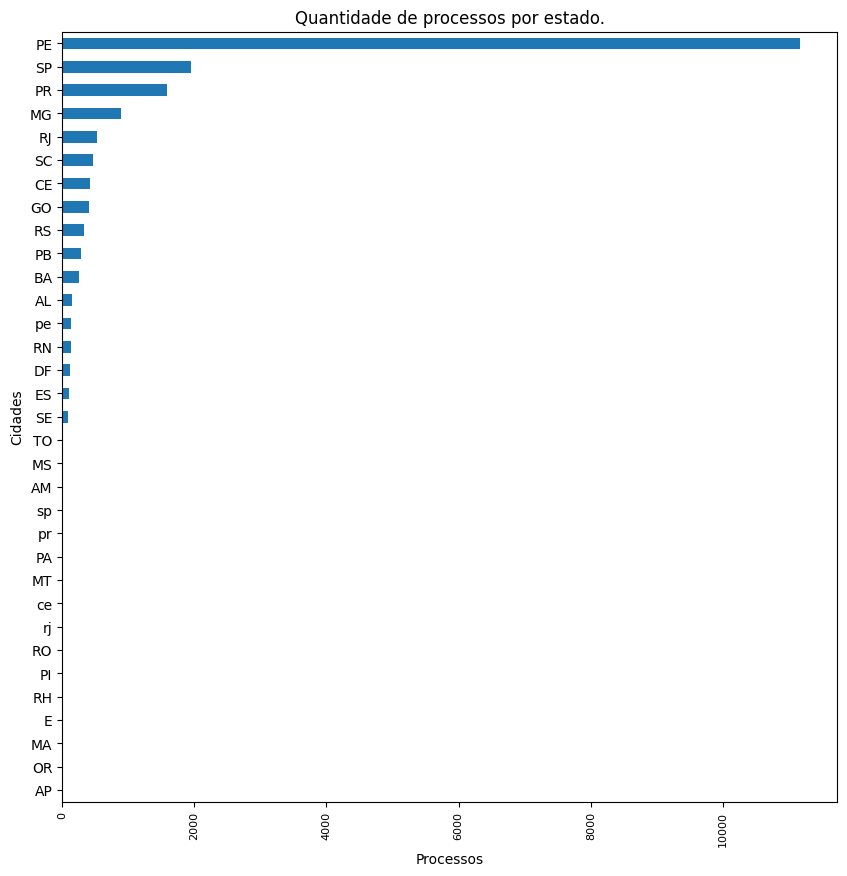

In [174]:
qtd_process_por_uf.plot(kind='barh', figsize=(10, 10))
plt.title('Quantidade de processos por estado.')
plt.xlabel('Processos')
plt.ylabel('Cidades')
plt.gca().invert_yaxis()
plt.xticks(rotation=90, fontsize=8)
plt.show()

In [175]:
process_pe=base[base["uf_endcontratado"]== "PE"]
process_pe["cidade_endcontratado"].value_counts()
# Quantidade de processos em pernambuco por cidades.


cidade_endcontratado
RECIFE                      7039
PAULISTA                    1082
JABOATAO DOS GUARARAPES      749
OLINDA                       575
MORENO                       214
AFOGADOS DA INGAZEIRA        161
CAMARAGIBE                   147
CARPINA                      146
IGARASSU                     141
JABOATÃO DOS GUARARAPES      123
CABO DE SANTO AGOSTINHO      106
ABREU E LIMA                  88
SAO LOURENCO DA MATA          61
IGARASSÚ                      46
GARANHUNS                     44
ALTINHO                       40
BEZERROS                      32
ITAPISSUMA                    31
SÃO LOURENÇO DA MATA          30
JABOATAO DOS GUARARPES        28
ESCADA                        23
SURUBIM                       22
SAO JOAQUIM DO MONTE          21
CARUARU                       19
ITAMARACA                     17
VITÓRIA DE SANTO ANTÃO        16
GRAVATA                       16
IPOJUCA                       14
TIMBAUBA                      14
GOIANA                

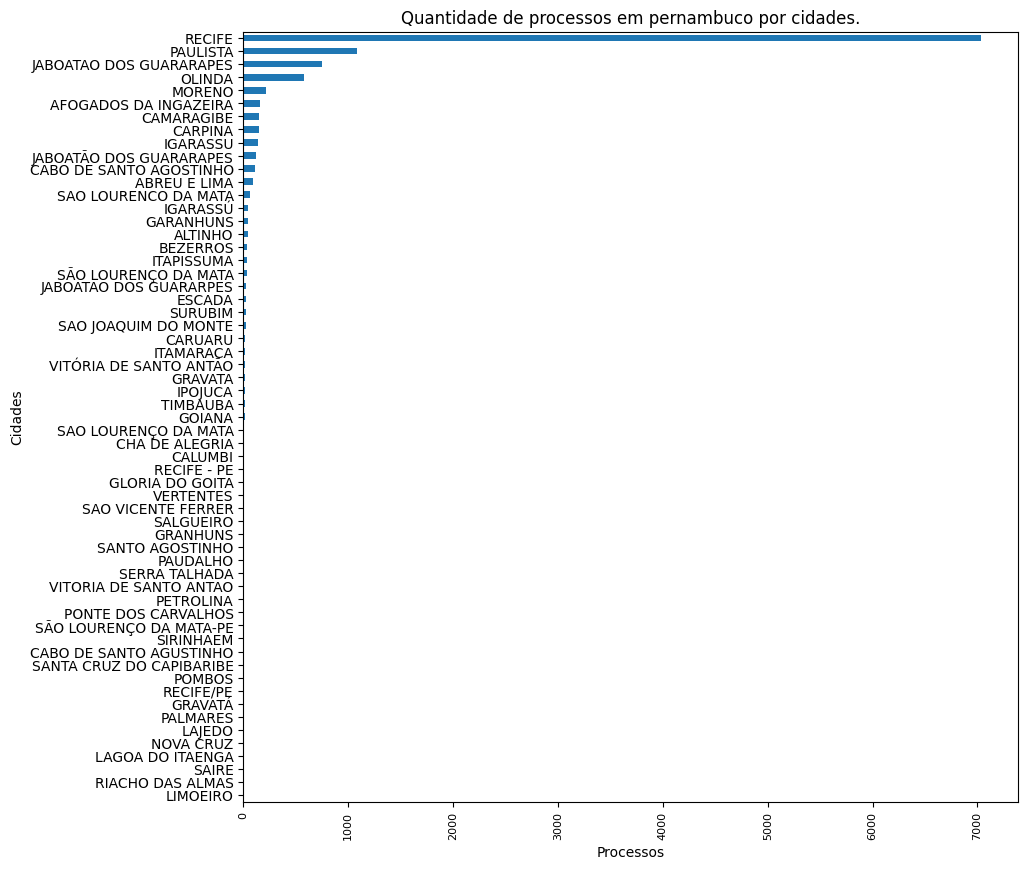

In [176]:
process_pe["cidade_endcontratado"].value_counts().plot(kind='barh', figsize=(10, 10))
plt.title('Quantidade de processos em pernambuco por cidades.')
plt.xlabel('Processos')
plt.ylabel('Cidades')
plt.gca().invert_yaxis()
plt.xticks(rotation=90, fontsize=8)
plt.show()

In [177]:
base[base["modalidadeprocessolicitatorio"]!= "PREGÃO ELETRÔNICO"]
# Os processos que não são da modalidade pregão eletrônico.

,comissao_licitacao,ano_processolicitatorio,num_processolicitatorio,numero_lote,modalidadeprocessolicitatorio,numerolicitacaomodalidade,anolicitacaomodalidade,orgao_licitante,objeto,cnpj_contratado,...,num_endcontratado,comp_endcontratado,bairro_endcontratado,cidade_endcontratado,uf_endcontratado,valor_total_estimado,valor_totalhomologadolicitacao,valor_licitacao_lote,data_aberturaproposta,data_ultimafaseprocesso
65,COMISSÃO PERMANENTE DE LICITAÇÃO DE OBRAS E SE...,2012,10,1,TOMADA DE PREÇOS,3,2012,SECRETARIA DE TURISMO E LAZER,PROJETO EXECUTIVO,3228052000108.0,...,855.0,SALA 208,PINA,RECIFE,PE,255313.88,255310.00,255310.00,2013-01-04 10:00:00,2013-02-28
69,COMISSÃO PERMANENTE DE LICITAÇÃO - FCCR,2012,48,1,PREGÃO PRESENCIAL,37,2012,FUNDACAO DE CULTURA CIDADE DO RECIFE,"CONTRATAÇÃO DE EMPRESA PARA MONTAGEM, MANUTENÇ...",41245606000174.0,...,55.0,BOA VISTA,CENTRO,IGARASSU,PE,1015946.67,824000.00,450000.00,2013-01-10 09:00:00,2013-01-22
70,COMISSÃO PERMANENTE DE LICITAÇÃO - FCCR,2012,48,2,PREGÃO PRESENCIAL,37,2012,FUNDACAO DE CULTURA CIDADE DO RECIFE,"CONTRATAÇÃO DE EMPRESA PARA MONTAGEM, MANUTENÇ...",4041447000160.0,...,142.0,NaN,CAXANGA,RECIFE,PE,1015946.67,824000.00,374000.00,2013-01-10 09:00:00,2013-01-22
71,COMISSÃO PERMANENTE DE LICITAÇÃO - FCCR,2012,55,1,PREGÃO PRESENCIAL,41,2012,FUNDACAO DE CULTURA CIDADE DO RECIFE,"CONTRATAÇÃO DE EMPRESA PARA MONTAGEM, MANUTENÇ...",41246265000151.0,...,226.0,NaN,ESTANCIA,RECIFE,PE,229028.00,132000.00,132000.00,2013-01-11 09:00:00,2013-01-14
72,COMISSÃO PERMANENTE DE LICITAÇÃO - FCCR,2012,56,1,PREGÃO PRESENCIAL,42,2012,FUNDACAO DE CULTURA CIDADE DO RECIFE,"CONTRATAÇÃO DE EMPRESA PARA MONTAGEM, MANUTENÇ...",41246265000151.0,...,226.0,NaN,ESTANCIA,RECIFE,PE,116325.66,76000.00,76000.00,2013-01-11 14:00:00,2013-01-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18997,GC-EMLURB-001,2024,2,1,CONCORRÊNCIA - ELETRÔNICA,2,2024,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,CONTRATAÇÃO DE EMPRESA DE ENGENHARIA PARA IMPL...,5625079000160.0,...,384.0,APTO. 001,BOA VIAGEM,RECIFE,PE,2445218.70,1730886.94,1730886.94,2024-05-06 12:00:00,2024-06-12
18998,GC-EMLURB-001,2024,3,1,CONCORRÊNCIA - ELETRÔNICA,3,2024,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,CONTRATAÇÃO DE EMPRESA ESPECIALIZADA DE ENGENH...,10893105000170.0,...,32.0,NaN,POCO DA PANELA,RECIFE,PE,370139.34,325648.98,325648.98,2024-04-16 09:30:00,2024-06-04
18999,GC-EMLURB-001,2024,4,1,CONCORRÊNCIA - ELETRÔNICA,4,2024,AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB,CONTRATAÇÃO DE EMPRESA ESPECIALIZADA DE ENGENH...,7654042000195.0,...,2391.0,SALA 104/05 CXP-006,BOA VIAGEM,RECIFE,PE,946268.65,745000.00,745000.00,2024-04-25 17:30:00,2024-05-22
19021,GC-SEPLAGTD-001,2024,1,2,LEILÃO - ELETRÔNICO,1,2024,"SECRETARIA DE PLANEJAMENTO, GESTÃO E TRANSFORM...",LEILÃO PÚBLICO DE BENS IMÓVEIS,18537507000144.0,...,630.0,NaN,SÃO JOSE,RECIFE,PE,780380.00,188036.40,188036.40,2024-03-27 10:00:00,2024-05-17


In [178]:
base["comissao_licitacao"].value_counts()

# Quantidade de processos em relação a sua respectiva comissão.


comissao_licitacao
COMISSÃO PERMANENTE DE LICITAÇÃO DE MATERIAIS DE SAÚDE - CPLMSA (GGLIC/SEPLAGTD)              5850
COMISSÃO PERMANENTE DE LICITAÇÃO DE SERVIÇOS DE SAÚDE - CPLSSA (GGLIC/SEPLAGTD)               3129
COMISSÃO PERMANENTE DE LICITAÇÃO DE MATERIAIS - CPLM (GGLIC/SEPLAGTD)                         1459
EQUIPE DE PREGÃO - EMLURB                                                                     1272
COMISSÃO DE LICITAÇÃO - EMLURB                                                                1148
COMISSÃO PERMANENTE DE LICITAÇÃO DE POLÍTICAS SOCIAIS E DESPORTO - CPLPSD (GGLIC/SEPLAGTD)    1055
COMISSÃO PERMANENTE DE LICITAÇÃO DE EDUCAÇÃO - CPLE (GGLIC/SEPLAGTD)                           925
COMISSÃO PERMANENTE DE LICITAÇÃO - FCCR                                                        752
COMISSÃO PERMANENTE DE LICITAÇÃO DE COMPRAS CORPORATIVAS - CPLCC (GGLIC/SEPLAGTD)              392
COMISSÃO PERMANENTE DE LICITAÇÃO - CTTU                                                   

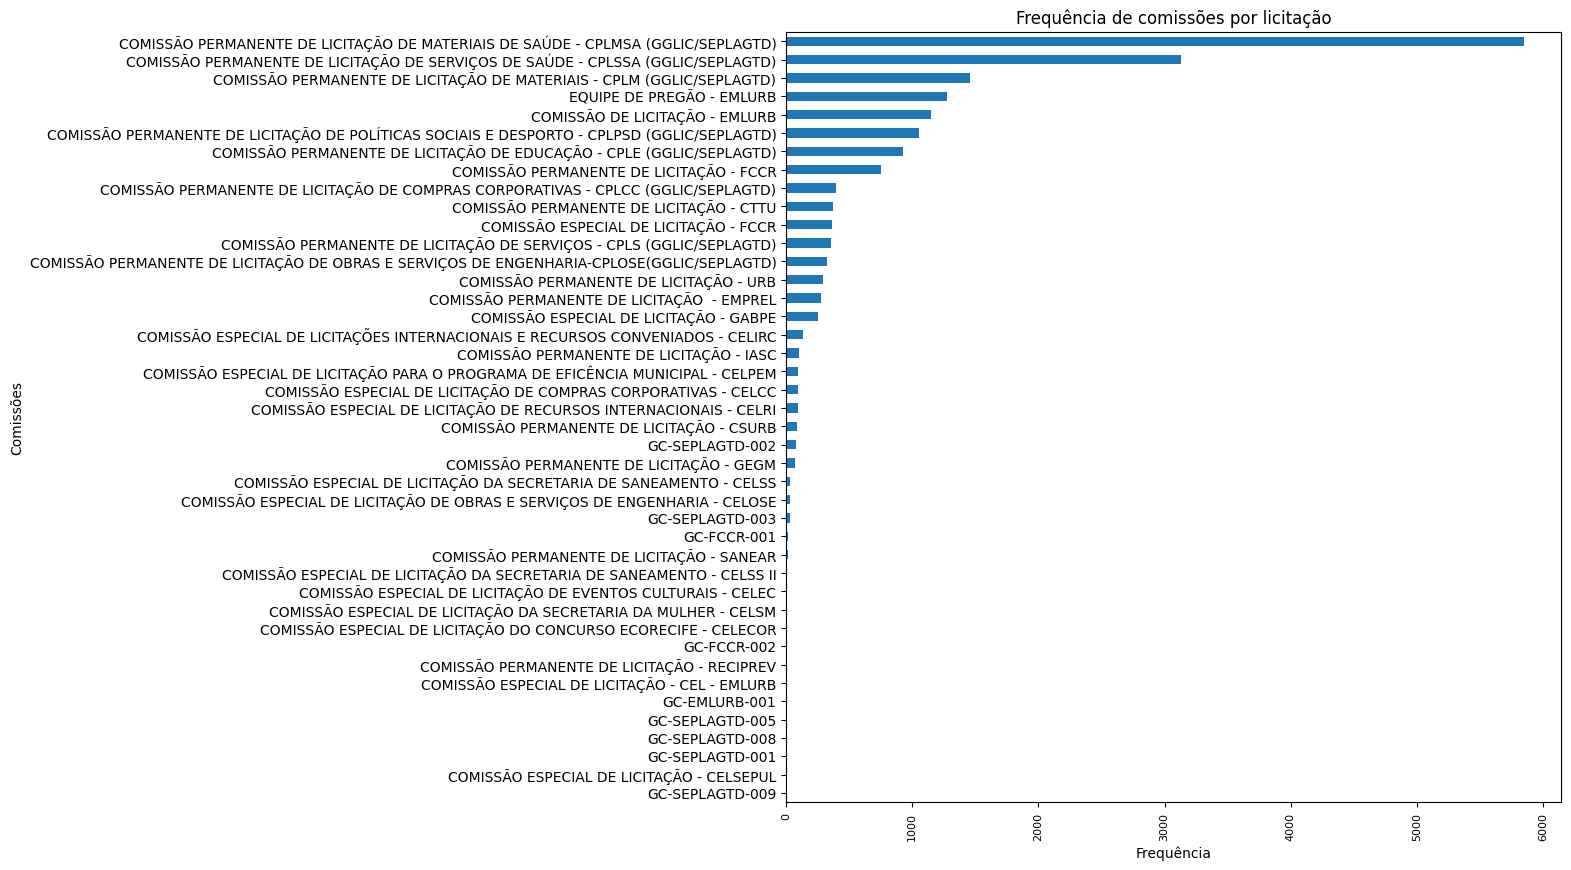

In [179]:
base["comissao_licitacao"].value_counts().plot(kind='barh', figsize=(10, 10))
plt.title('Frequência de comissões por licitação')
plt.xlabel('Frequência')
plt.ylabel('Comissões')
plt.gca().invert_yaxis()
plt.xticks(rotation=90, fontsize=8)
plt.show()

In [180]:
base["orgao_licitante"].value_counts()
# quantidade de licitações por orgãos licitantes.



orgao_licitante
FUNDO MUNICIPAL DE SAUDE                                                                      10303
AUTARQUIA DE MANUTENCAO E LIMPEZA URBANA - EMLURB                                              2427
FUNDACAO DE CULTURA CIDADE DO RECIFE                                                           1139
SECRETARIA DE EDUCAÇÃO                                                                          966
FUNDO MUNICIPAL DE ASSISTÊNCIA SOCIAL - FMAS                                                    862
SECRETARIA DE GOVERNO E PARTICIPAÇÃO SOCIAL                                                     579
SECRETARIA DE PLANEJAMENTO, GESTÃO E TRANSFORMAÇÃO DIGITAL                                      569
AUTARQUIA DE TRANSITO E TRANSPORTE URBANO DO RECIFE - CTTU                                      368
AUTARQUIA DE URBANIZACAO DO RECIFE                                                              293
EMPRESA MUNICIPAL DE INFORMÁTICA - EMPREL                                           

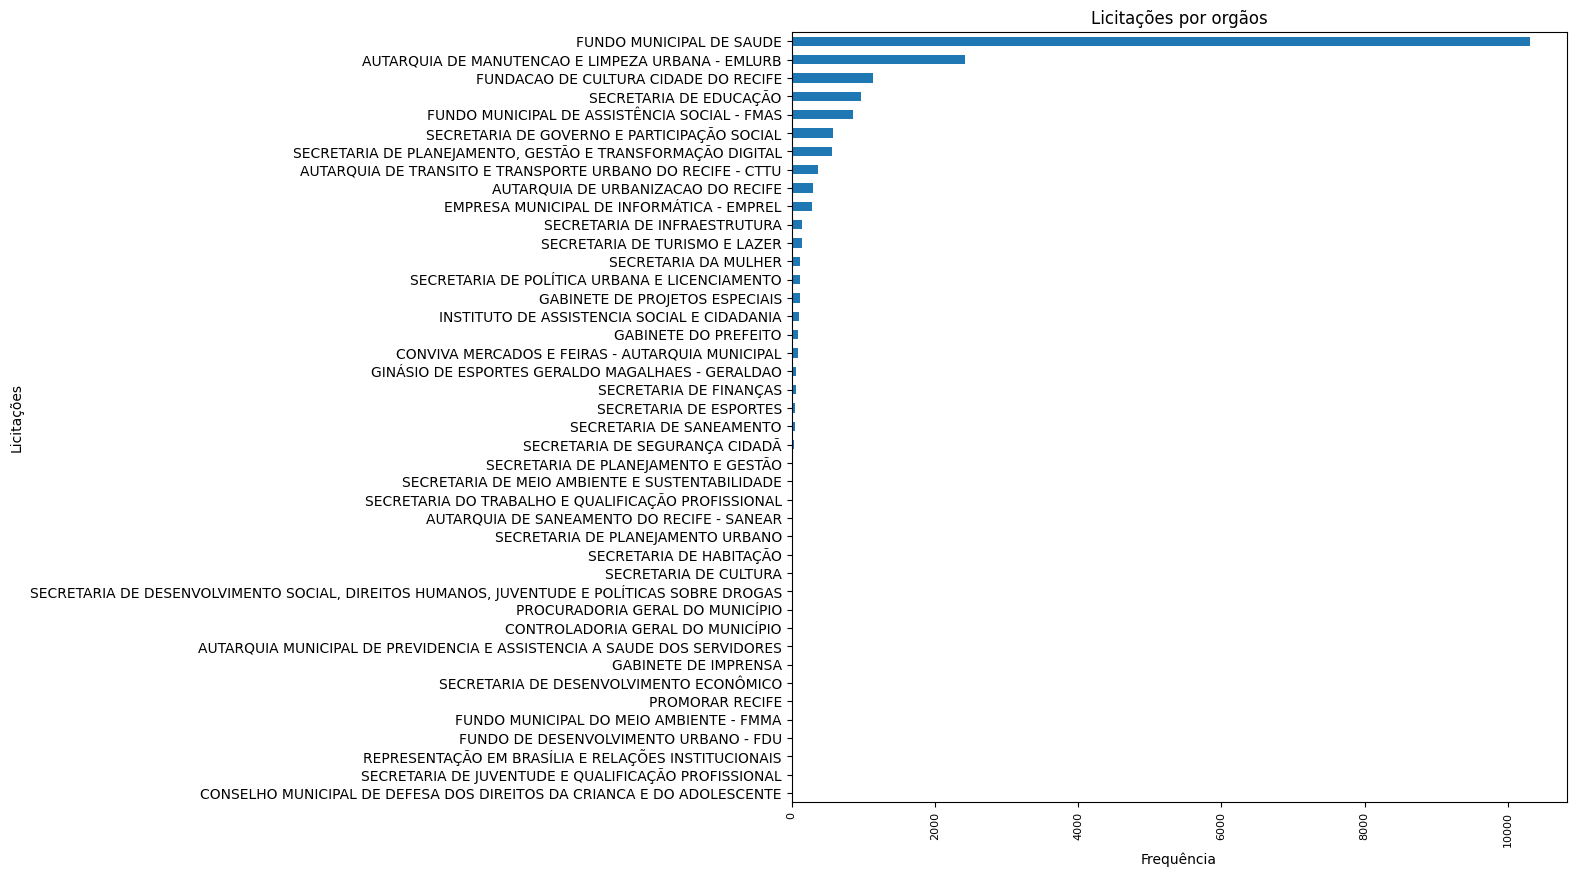

In [181]:
base["orgao_licitante"].value_counts().plot(kind='barh', figsize=(10, 10))
plt.title('Licitações por orgãos')
plt.xlabel('Frequência')
plt.ylabel('Licitações')
plt.gca().invert_yaxis()
plt.xticks(rotation=90, fontsize=8)
plt.show()

In [182]:
base["objeto"].value_counts()
# Quantidade de licitações para aquisição de materiais.

objeto
ABERTURA DE PROCESSO LICITATORIO PARA AQUISICAO DE MATERIAL MEDICO HOSPITALAR PARA ATENDER AS NECESSIDADES DA REDE MUNICIPAL DE SAUDE DE RECIFE.                                                         290
ABERTURA DE PROCESSO LICITATÓRIO PARA AQUISIÇÃO DE MEDICAMENTOS PARA ATENDER AS NECESSIDADES DA REDE MUNICIPAL DE SAÚDE.                                                                                 267
REGISTRO DE PREÇO PARA AQUISIÇÃO DE MATERIAL MEDICO HOSPITALAR COM VALIDADE DE 12 ( DOZE ) MESES, PARA A SECRETARIA DE SAÚDE DO RECIFE.                                                                  178
REGISTRO DE PREÇOS, PARA AQUISIÇÃO DE MATERIAIS ELÉTRICOS DE ACORDO COM O ITEM 4.0, DESTINADOS A CONSERVAÇÃO E MANUTENÇÃO DA ILUMINAÇÃO PÚBLICA DA CIDADE DO RECIFE.                                     144
REGISTRO DE PREÇOS COM VALIDADE DE 12 (DOZE) MESES PARA AQUISIÇÃO DE MEDICAMENTOS - 168 (CENTO E SESSENTA E OITO) LOTES, PARA ATENDER AS NECESSIDADES DA SECRETARIA DE SAÚDE 

In [183]:
qtd_process_maior_2022=base[base["ano_processolicitatorio"]>= 2022]
qtd_process_maior_2022["objeto"].value_counts()

# quantidade de objetos mais solicitados de apartir do ano de 2022 até a atualidade.

objeto
AQUISICAO DE MATERIAL MEDICO HOSPITALAR PARA ATENDER AS DEMANDAS DO HOPSITAL VETERINARIO DO RECIFE EM 104  CENTO E QUATRO  LOTES.                                                                                       97
REGISTRO DE PRECOS. COM VALIDADE DE 12  DOZE  MESES. PARA AQUISICAO DE FORMULAS NUTRICIONAIS. 70  SETENTA  LOTES. PARA ATENDER AS NECESSIDADES DA SECRETARIA DE SAUDE DA PREFEITURA DA CIDADE DO RECIFE                 64
AQUISICAO DE PRODUTOS DE HIGIENE E LIMPEZA                                                                                                                                                                              53
REGISTRO DE PRECOS. PELO PERIODO DE 12  DOZE  MESES. PARA AQUISICAO DE HORTIFRUTIGRANJEIROS. EM 49  QUARENTA E NOVE  LOTES. A FIM DE ATENDER AS NECESSIDADES DAS UNIDADES DE ACOLHIMENTO DA SDSDHJPD                    49
AQUISICAO DE MEDICAMENTOS DE USO VETERINARIO PARA 51  CINQUENTA E UM  LOTES. PARA A SECRETARIA EXECUTIVA DOS DIREITOS

<h3> Estrutura do Dataset</h3>

In [184]:
base.shape
# Quantidade de linhas e colunas do dataset.

(19131, 23)

<h3> Análise Estatística</h3>

<h5> Valor Total Homologado. </h5>

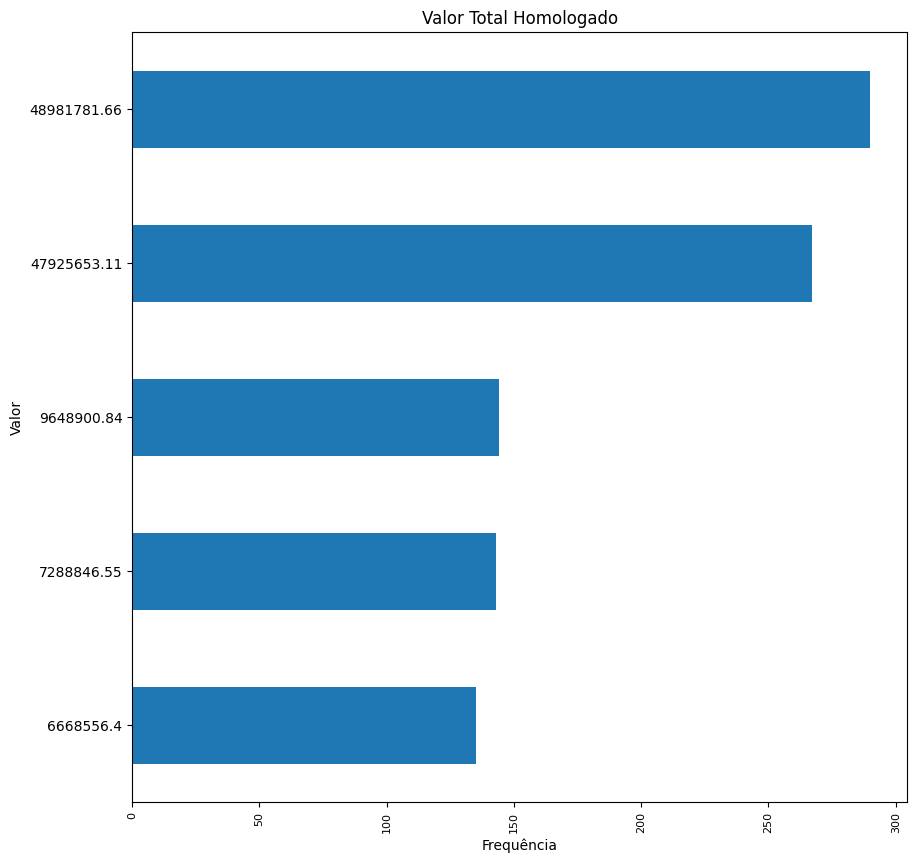

In [185]:
# prompt: Crie um gráfico com os valores do valor total homologado em relação a sua respectiva frequência. Faça uma restrição dos 5 mais frequentes...

base["valor_totalhomologadolicitacao"].value_counts().head(5).plot(kind='barh', figsize=(10, 10))
plt.title('Valor Total Homologado')
plt.xlabel('Frequência')
plt.ylabel('Valor')
plt.gca().invert_yaxis()
plt.xticks(rotation=90, fontsize=8)
plt.show()


<h6>  Moda  </h6>

In [186]:
base["valor_totalhomologadolicitacao"].mode()

0    48981781.66
Name: valor_totalhomologadolicitacao, dtype: float64

<h6>  Média  </h6>

In [187]:
base["valor_totalhomologadolicitacao"].mean()

4949676.153772411

<h6>  Médiana </h6>

In [188]:
base["valor_totalhomologadolicitacao"].median()

934045.55

<h6> Variância </h6>

In [189]:
base["valor_totalhomologadolicitacao"].var()

336869848544124.4

<h6>Desvio Padrão</h6>

In [190]:
base["valor_totalhomologadolicitacao"].std()

18354014.507570937

<h6> Assimetria: Sendo ela positiva, indicando uma cauda mais longa ou mais espessa à direita. </h6>

In [191]:
base["valor_totalhomologadolicitacao"].skew()

33.641281184396206

<h6> Curtose: <strong>Leptocúrtica</strong>,pois tem um excesso de curtose positiva.</h6>

In [192]:
base["valor_totalhomologadolicitacao"].kurtosis()

1694.6579564678113

<h5> Valor de licitação por lote </h5>

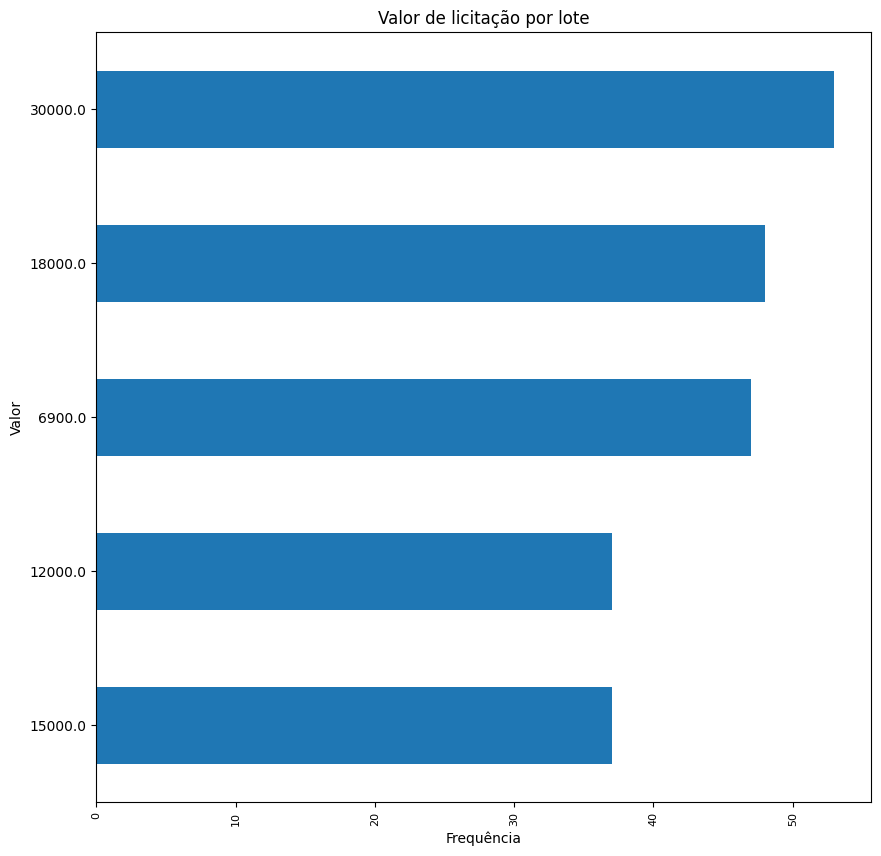

In [193]:
base["valor_licitacao_lote"].value_counts().head(5).plot(kind='barh', figsize=(10, 10))
plt.title('Valor de licitação por lote')
plt.xlabel('Frequência')
plt.ylabel('Valor')
plt.gca().invert_yaxis()
plt.xticks(rotation=90, fontsize=8)
plt.show()

<h6> Moda</h6>

In [194]:
base["valor_licitacao_lote"].mode()

0    30000.0
Name: valor_licitacao_lote, dtype: float64

<h6>  Média  </h6>

In [195]:
base["valor_licitacao_lote"].mean()

803066.9633960588

<h6>  Mediana  </h6>

In [196]:
base["valor_licitacao_lote"].median()

46194.0

<h6> Variância </h6>

In [197]:
base["valor_licitacao_lote"].var()

89619700094276.73

<h6>Desvio Padrão</h6>

In [198]:
base["valor_licitacao_lote"].std()

9466768.196923211

<h6> Assimetria: Sendo ela positiva, indicando uma cauda mais longa ou mais espessa à direita. </h6>

In [199]:
base["valor_licitacao_lote"].skew()

58.26417530952963

<h6> Curtose: <strong>Leptocúrtica</strong>,pois tem um excesso de curtose positiva.</h6>

In [200]:
base["valor_licitacao_lote"].kurtosis()

4031.46927172157

In [201]:
base.columns

Index(['comissao_licitacao', 'ano_processolicitatorio',
       'num_processolicitatorio', 'numero_lote',
       'modalidadeprocessolicitatorio', 'numerolicitacaomodalidade',
       'anolicitacaomodalidade', 'orgao_licitante', 'objeto',
       'cnpj_contratado', 'cpf_contratado', 'razao_nomecontratado',
       'logradouro_endcontratado', 'num_endcontratado', 'comp_endcontratado',
       'bairro_endcontratado', 'cidade_endcontratado', 'uf_endcontratado',
       'valor_total_estimado', 'valor_totalhomologadolicitacao',
       'valor_licitacao_lote', 'data_aberturaproposta',
       'data_ultimafaseprocesso'],
      dtype='object')

In [202]:
base

,comissao_licitacao,ano_processolicitatorio,num_processolicitatorio,numero_lote,modalidadeprocessolicitatorio,numerolicitacaomodalidade,anolicitacaomodalidade,orgao_licitante,objeto,cnpj_contratado,...,num_endcontratado,comp_endcontratado,bairro_endcontratado,cidade_endcontratado,uf_endcontratado,valor_total_estimado,valor_totalhomologadolicitacao,valor_licitacao_lote,data_aberturaproposta,data_ultimafaseprocesso
0,COMISSÃO PERMANENTE DE LICITAÇÃO DE EDUCAÇÃO -...,2012,29,1,PREGÃO ELETRÔNICO,27,2012,SECRETARIA DE EDUCAÇÃO,MATERIAL GRÁFICO,758606000190.0,...,301.0,NaN,BULTRINS,OLINDA,PE,333750.00,66358.00,15210.00,2012-12-20 10:00:00,2013-01-07
1,COMISSÃO PERMANENTE DE LICITAÇÃO DE EDUCAÇÃO -...,2012,29,2,PREGÃO ELETRÔNICO,27,2012,SECRETARIA DE EDUCAÇÃO,MATERIAL GRÁFICO,7211171000109.0,...,5327.0,NaN,CANDEIAS,JABOATAO DOS GUARARAPES,PE,333750.00,66358.00,51148.00,2012-12-20 10:00:00,2013-01-07
2,COMISSÃO PERMANENTE DE LICITAÇÃO DE EDUCAÇÃO -...,2012,30,1,PREGÃO ELETRÔNICO,28,2012,SECRETARIA DE EDUCAÇÃO,AGENDA ESCOLAR 2013,13898993000102.0,...,0.0,LOJA 005,CIDADE UNIVERSITARIA,MACEIO,AL,530469.54,357895.02,357895.02,2013-01-02 10:00:00,2013-01-09
3,COMISSÃO PERMANENTE DE LICITAÇÃO DE MATERIAIS ...,2012,23,4,PREGÃO ELETRÔNICO,23,2012,FUNDO MUNICIPAL DE SAUDE,"AQUISIÇÃO DE PNEUS, PARA ATENDER AS NECESSIDAD...",10511406000192.0,...,810.0,LOJA 01,PRAZERES,JABOATAO DOS GUARARAPES,PE,16870.35,1518.00,800.00,2012-12-19 11:00:00,2013-03-01
4,COMISSÃO PERMANENTE DE LICITAÇÃO DE MATERIAIS ...,2012,23,5,PREGÃO ELETRÔNICO,23,2012,FUNDO MUNICIPAL DE SAUDE,"AQUISIÇÃO DE PNEUS, PARA ATENDER AS NECESSIDAD...",10511406000192.0,...,810.0,LOJA 01,PRAZERES,JABOATAO DOS GUARARAPES,PE,16870.35,1518.00,718.00,2012-12-19 11:00:00,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19126,GC-SEPLAGTD-005,2024,3,1,PREGÃO ELETRÔNICO,2,2024,"SECRETARIA DE PLANEJAMENTO, GESTÃO E TRANSFORM...",CONSTITUI OBJETO DESTE TERMO A CONTRATAÇÃO DOS...,27595780000116.0,...,400.0,SALA 08,VILA CINTRA,MOGI DAS CRUZES,SP,9578891.04,6054687.84,1754694.24,2024-05-20 17:00:00,2024-06-13
19127,GC-SEPLAGTD-005,2024,3,2,PREGÃO ELETRÔNICO,2,2024,"SECRETARIA DE PLANEJAMENTO, GESTÃO E TRANSFORM...",CONSTITUI OBJETO DESTE TERMO A CONTRATAÇÃO DOS...,27595780000116.0,...,400.0,SALA 08,VILA CINTRA,MOGI DAS CRUZES,SP,9578891.04,6054687.84,4299993.60,2024-05-20 17:00:00,2024-06-13
19128,GC-SEPLAGTD-008,2024,9,1,PREGÃO ELETRÔNICO,1,2024,SECRETARIA DE INFRAESTRUTURA,CONTRATAÇÃO PARCELADA DOS SERVIÇOS DE DEMOLIÇÃ...,70215447000163.0,...,537.0,NaN,CURADO,RECIFE,PE,12472497.12,10048265.12,10048265.12,2024-04-18 14:00:00,2024-05-28
19129,GC-SEPLAGTD-008,2024,13,1,PREGÃO ELETRÔNICO,2,2024,SECRETARIA DE INFRAESTRUTURA,"CAÇAMBA ESTACIONÁRIA, COM CAPACIDADE DE NO MÍN...",10811370000162.0,...,550.0,NaN,CANDEIAS,JABOATAO DOS GUARARAPES,PE,2985899.18,2449956.60,2449956.60,2024-05-06 14:00:00,2024-06-03


In [208]:
# prompt: Usando o DataFrame base:  Usando o DataFrame base: make me a new column that checks if the cidade_endcontratado is =  'RECIFE' and fill the column with 1 if its true and  0 if its false

base['recife'] = base['cidade_endcontratado'].apply(lambda x: 1 if x == 'RECIFE' else 0)


In [210]:
base

,comissao_licitacao,ano_processolicitatorio,num_processolicitatorio,numero_lote,modalidadeprocessolicitatorio,numerolicitacaomodalidade,anolicitacaomodalidade,orgao_licitante,objeto,cnpj_contratado,...,cidade_endcontratado,uf_endcontratado,valor_total_estimado,valor_totalhomologadolicitacao,valor_licitacao_lote,data_aberturaproposta,data_ultimafaseprocesso,recife,Probability,Classification
0,COMISSÃO PERMANENTE DE LICITAÇÃO DE EDUCAÇÃO -...,2012,29,1,PREGÃO ELETRÔNICO,27,2012,SECRETARIA DE EDUCAÇÃO,MATERIAL GRÁFICO,758606000190.0,...,OLINDA,PE,333750.00,66358.00,15210.00,2012-12-20 10:00:00,2013-01-07,0,0.388573,1
1,COMISSÃO PERMANENTE DE LICITAÇÃO DE EDUCAÇÃO -...,2012,29,2,PREGÃO ELETRÔNICO,27,2012,SECRETARIA DE EDUCAÇÃO,MATERIAL GRÁFICO,7211171000109.0,...,JABOATAO DOS GUARARAPES,PE,333750.00,66358.00,51148.00,2012-12-20 10:00:00,2013-01-07,0,0.386426,1
2,COMISSÃO PERMANENTE DE LICITAÇÃO DE EDUCAÇÃO -...,2012,30,1,PREGÃO ELETRÔNICO,28,2012,SECRETARIA DE EDUCAÇÃO,AGENDA ESCOLAR 2013,13898993000102.0,...,MACEIO,AL,530469.54,357895.02,357895.02,2013-01-02 10:00:00,2013-01-09,0,0.652995,0
3,COMISSÃO PERMANENTE DE LICITAÇÃO DE MATERIAIS ...,2012,23,4,PREGÃO ELETRÔNICO,23,2012,FUNDO MUNICIPAL DE SAUDE,"AQUISIÇÃO DE PNEUS, PARA ATENDER AS NECESSIDAD...",10511406000192.0,...,JABOATAO DOS GUARARAPES,PE,16870.35,1518.00,800.00,2012-12-19 11:00:00,2013-03-01,0,0.373084,1
4,COMISSÃO PERMANENTE DE LICITAÇÃO DE MATERIAIS ...,2012,23,5,PREGÃO ELETRÔNICO,23,2012,FUNDO MUNICIPAL DE SAUDE,"AQUISIÇÃO DE PNEUS, PARA ATENDER AS NECESSIDAD...",10511406000192.0,...,JABOATAO DOS GUARARAPES,PE,16870.35,1518.00,718.00,2012-12-19 11:00:00,2013-03-01,0,0.371571,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19126,GC-SEPLAGTD-005,2024,3,1,PREGÃO ELETRÔNICO,2,2024,"SECRETARIA DE PLANEJAMENTO, GESTÃO E TRANSFORM...",CONSTITUI OBJETO DESTE TERMO A CONTRATAÇÃO DOS...,27595780000116.0,...,MOGI DAS CRUZES,SP,9578891.04,6054687.84,1754694.24,2024-05-20 17:00:00,2024-06-13,0,0.896099,0
19127,GC-SEPLAGTD-005,2024,3,2,PREGÃO ELETRÔNICO,2,2024,"SECRETARIA DE PLANEJAMENTO, GESTÃO E TRANSFORM...",CONSTITUI OBJETO DESTE TERMO A CONTRATAÇÃO DOS...,27595780000116.0,...,MOGI DAS CRUZES,SP,9578891.04,6054687.84,4299993.60,2024-05-20 17:00:00,2024-06-13,0,0.902991,0
19128,GC-SEPLAGTD-008,2024,9,1,PREGÃO ELETRÔNICO,1,2024,SECRETARIA DE INFRAESTRUTURA,CONTRATAÇÃO PARCELADA DOS SERVIÇOS DE DEMOLIÇÃ...,70215447000163.0,...,RECIFE,PE,12472497.12,10048265.12,10048265.12,2024-04-18 14:00:00,2024-05-28,1,0.521102,0
19129,GC-SEPLAGTD-008,2024,13,1,PREGÃO ELETRÔNICO,2,2024,SECRETARIA DE INFRAESTRUTURA,"CAÇAMBA ESTACIONÁRIA, COM CAPACIDADE DE NO MÍN...",10811370000162.0,...,JABOATAO DOS GUARARAPES,PE,2985899.18,2449956.60,2449956.60,2024-05-06 14:00:00,2024-06-03,0,0.551607,0


In [209]:
label_encoder = LabelEncoder()

df_encoded = base.copy()

columns_to_encode = ['orgao_licitante', 'objeto', 'razao_nomecontratado',
                     'uf_endcontratado','ano_processolicitatorio','valor_total_estimado','comissao_licitacao',
                     'modalidadeprocessolicitatorio','data_aberturaproposta','data_ultimafaseprocesso']

# Aplicando LabelEncoder às colunas categóricas
for column in columns_to_encode:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])


#Retirando as colunas Nome e Ticket
df_encoded = df_encoded.drop(['cidade_endcontratado','num_endcontratado','cnpj_contratado','cpf_contratado','bairro_endcontratado','comp_endcontratado','valor_totalhomologadolicitacao','valor_licitacao_lote','logradouro_endcontratado'], axis=1)


x_train, x_test, y_train, y_test = train_test_split(df_encoded.drop(['recife'],axis=1),
                                                     df_encoded['recife'],
                                                     test_size = 0.3,
                                                     random_state = 1234)

[{'treino':x_train.shape},{'teste':x_test.shape}]

rf = RandomForestClassifier(n_estimators=1000,
                            criterion='gini',
                            max_depth = 5)

rf.fit(x_train,y_train)

prob = rf.predict_proba(df_encoded.drop('recife',axis =1))[:,0]
cla = rf.predict(df_encoded.drop('recife',axis = 1))

base['Probability'] = prob
base['Classification'] = cla

In [211]:
df_encoded

,comissao_licitacao,ano_processolicitatorio,num_processolicitatorio,numero_lote,modalidadeprocessolicitatorio,numerolicitacaomodalidade,anolicitacaomodalidade,orgao_licitante,objeto,razao_nomecontratado,uf_endcontratado,valor_total_estimado,data_aberturaproposta,data_ultimafaseprocesso,recife,Probability,Classification
0,25,0,29,1,8,27,2012,26,2274,1611,16,1577,4,0,0,1.0,0
1,25,0,29,2,8,27,2012,26,2274,1209,16,1577,4,0,0,1.0,0
2,25,0,30,1,8,28,2012,26,110,2196,0,1948,6,1,0,1.0,0
3,26,0,23,4,8,23,2012,12,530,1792,16,73,3,17,0,1.0,0
4,26,0,23,5,8,23,2012,12,530,1792,16,73,3,17,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19126,39,12,3,1,8,2,2024,36,755,569,26,3864,3251,2094,0,1.0,0
19127,39,12,3,2,8,2,2024,36,755,569,26,3864,3251,2094,0,1.0,0
19128,40,12,9,1,8,1,2024,31,1942,39,16,3975,3241,2086,1,1.0,0
19129,40,12,13,1,8,2,2024,31,619,1009,16,3248,3249,2089,0,1.0,0


In [214]:
def prever_sobrevivencia(model, attributes, df_template):
    """
    Função para prever a probabilidade de sobrevivência com base em atributos fornecidos.

    Parâmetros:
    - model: O modelo treinado (Random Forest).
    - attributes: Um dicionário contendo os atributos necessários para a predição.
    - df_template: DataFrame usado como template para manter a ordem e colunas corretas.

    Retorna:
    - probabilidade: A probabilidade de sobrevivência.
    - classificacao: 1 se a pessoa provavelmente sobreviveu, 0 caso contrário.
    """
    # Crie um DataFrame com os atributos fornecidos
    df = pd.DataFrame([attributes])

    # Colunas necessárias para a predição, baseadas no df_template, excluindo 'recife'
    columns_to_use = df_template.drop('recife', axis=1).columns

    # Reindexe para garantir que todas as colunas estejam presentes e na ordem correta
    df = df.reindex(columns=columns_to_use, fill_value=0)

    # Faça a previsão
    probabilidade = model.predict_proba(df)[:, 1][0]
    classificacao = model.predict(df)[0]

    return probabilidade, classificacao

In [216]:
# Exemplo de uso da função
atributos_exemplo = {
    'orgao_licitante': 2,
    'objeto': 0,
    'razao_nomecontratado': 40,
    'uf_endcontratado': 1,
    'ano_processolicitatorio': 0,
    'valor_total_estimado': 5000,
    'comissao_licitacao': 2,
    'modalidadeprocessolicitatorio': 1,
    'data_aberturaproposta': 2,
     'data_ultimafaseprocesso': 2
}


probabilidade, classificacao = prever_sobrevivencia(rf, atributos_exemplo, df_encoded)
print(f'Probabilidade da licitação ser em Recife: {probabilidade:.2f}')
print(f'Classificação: {"Foi em Recife" if classificacao == 1 else "Não foi em Recife"}')

Probabilidade da licitação ser em Recife: 0.34
Classificação: Não foi em Recife
